# Знакомство с NumPy

### Индивидуальное домашнее задание

### Кайгородов Александр Александрович (kaa120), группа: Поток 2

**Выполните указанные ниже действия, сохраните свою работу в виде ipynb-файла с именем `kaa120_hwnumpy01.ipynb` и прикрепите этот файл к сообщению своему преподавателю**.

**Задание 1.** Задана функция `f_python(a, b)`, преобразующая переданные ей два состоящих
из целых чисел списка `a` и `b` одинаковой длины в третий целочисленный список:

~~~
def f_python(a, b):
    return [ **(a[i] & b[i]) * 2 + (a[i] | b[i]) // 3** for i in range(len(a))] 
~~

Объясните подробно (устно), что происходит при следующем вызове этой функции:
~~~
f_python([248], [247])

==============================================================================================================
Тернарный оператор работает поэлементно с индексами введенных массивов. Выполняются следующие преобразования: 
    - побитовое И
    - побитовое ИЛИ. 
Далее полученные значения обратно преобразуются в десятичные и считаются согласно указанным преобразованиям.

==============================================================================================================
~~~

Используя библиотеку NumPy и Jupyter Notebook реализуйте функцию
`f_numpy(a, b)`, которая будет выполнять аналогичное преобразование двух
целочисленных массивов, все элементы которых неотрицательны и меньше
1_000_000, обеспечивая более быстрое получение результата. 

Напишите далее программный код, позволяющий оценить отношение времён работы 
функций `f_python(a, b)` и `f_numpy(a, b)` на списках/массивах, состоящих
из миллиона полученных с помощью функции
 `random.chоices(range(1_000_000), k = 1_000_000)` случайных целых чисел. 

*С целью достижения максимального
ускорения используйте для элементов массива наиболее подходящий тип из
[имеющихся в библиотеке 
NumPy](https://docs.scipy.org/doc/numpy/user/basics.types.html)
беззнаковых типов для представления целых чисел.*

Для определения времени работы
рекомендуется использовать функцию `time.time()`, а не 
[«магические команды»](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
`%time` или `%timeit`, которые доступны при работе в Jupyter Notebook и с
которыми рекомендуется
[познакомиться](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-time).

В результате решения задачи должны быть определены и напечатаны:

- тип элементов массива;
- коэффициент ускорения работы программы после описанной выше модификации,
  округлённый до целого числа.


In [1]:
import numpy as np
import time
from random import choices

In [2]:
def f_python(a, b): 
    print( 'in f_python: ', type(a), type(b))
    t1 = time.time()
    c = [ ((a[i] & b[i]) * 2 + (a[i] | b[i]) // 3) for i in range(len(a))]
    t2 = time.time()
    return abs(t2-t1)


def f_numpy(a, b):
    a, b = np.array(a, dtype=np.uint32), np.array(b, dtype=np.uint32)
    print( 'in f_numpy: ', type(a), type(b))
    t1 = time.time()
    c = (a & b) * 2 + (a | b) // 3
    t2 = time.time()
    return abs(t2-t1)

In [3]:
a, b = choices(range(1_000_000), k = 1_000_000), choices(range(1_000_000), k = 1_000_000)

# скорость расчета может зависеть от нагруженности машины сторонними процессами
# зачение ускорения осреднено по 10 наблюдениям
NUMP = f_numpy(a, b)
LIST = f_python(a, b)
print(f'Avg acceleration of computing is {round(LIST/NUMP, 6)} times')

in f_numpy:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
in f_python:  <class 'list'> <class 'list'>
Avg acceleration of computing is 36.355293 times


**Задание 2.** Используя обобщённый на n-мерное пространство метод прямоугольников 
нахождения приближённого значения определённого интеграла, вычислите 
$\displaystyle \int\limits_{2}^{4}\int\limits_{4}^{5}\int\limits_{2}^{3}\int\limits_{1}^{6}\int\limits_{3}^{6}\int\limits_{4}^{6} \left(x_{2} e^{x_{5}} + 2 x_{4} + x_{6}^{3} + \left(- 2 x_{1} + x_{3}\right)^{5}\right)\, dx_{1}\, dx_{2}\, dx_{3}\, dx_{4}\, dx_{5}\, dx_{6}$ как сумму значений подынтегральной функции в
узлах сетки, получаемой в результате разбиения области интегрирования,
умноженную на n-мерный объём параллелепипеда — ячейки разбиения.
Для получения сетки отрезок изменения каждой из переменных следует
разделить на 20 равных частей. В случае появления ошибки, связанной с нехваткой
оперативной памяти, константу 20 необходимо уменьшить.

Точное значение интеграла следует найти с помощью библиотеки SymPy, a
для вычисления приближённого значения надо использовать функции `ogrid` и `sum`
библиотеки NumPy. Завершить решение следует вычислением относительной
погрешности найденного приближённого значения заданного интеграла. 
Рекомендуется ознакомиться с решением подобной задачи из
раздела [1.3.5.4. Crude integral approximations руководства 'Scipy Lecture
Notes'](http://scipy-lectures.org/intro/numpy/exercises.html#crude-integral-approximations).

В результате решения задачи должны быть найдены:

- точное значение интеграла с четырьмя значащими цифрами;
- его приближённое значение, округлённое до четырёх значащих цифр
  (его можно напечатать с помощью формата `%.4g`);
- относительная погрешность приближённого значения в процентах,
  округлённая до десятых.


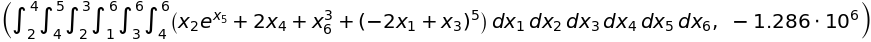

In [4]:
from sympy import *
init_printing()

var('x1, x2, x3, x4, x5, x6')
fun = x2*exp(x5)+2*x4+x6**3+(-2*x1+x3)**5

answer = N(integrate(fun, (x1,4,6), (x2,3,6), (x3,1,6), (x4,2,3), (x5,4,5), (x6,2,4)), 4)
(Integral(fun, (x1,4,6), (x2,3,6), (x3,1,6), (x4,2,3), (x5,4,5), (x6,2,4)), answer)

n = 20

h1 = (6-4)/n
h2 = (6-3)/n
h3 = (6-1)/n
h4 = (3-2)/n
h5 = (5-4)/n
h6 = (4-2)/n

H = h1*h2*h3*h4*h5*h6

x1 = np.ogrid[4:6:21j]
x2 = np.ogrid[3:6:21j]
x3 = np.ogrid[1:6:21j]
x4 = np.ogrid[2:3:21j]
x5 = np.ogrid[4:5:21j]
x6 = np.ogrid[2:4:21j]


arr1, arr = np.array([0]), np.array([0])
sum = np.array([0])
for i in range(20):
    for j in range(20):
        print(arr)
        for k in range(20):
            for l in range(20):
                for m in range(20):
                    for n in range(20):
                        #arr1 += (x2[j]*exp(x5[m])+2*x4[l]+x6[n]**3+(-2*x1[i]+x3[k])**5)*H
                        #arr2 += (x2[m]*exp(x5[j])+2*x4[k]+x6[i]**3+(-2*x1[n]+x3[l])**5)*H
                        #arr1 = np.array([x2[j]*exp(x5[m])+2*x4[l]+x6[n]**3+(-2*x1[i]+x3[k])**5*H])
                        arr1 = np.array([(x2[j]*E**(x5[m])+2*x4[l]+x6[n]**3+(-2*x1[i]+x3[k])**5)*H])
                        arr = arr + arr1

print(N(Answer), (sum), H)
print(arr1, arr2)
print(x6[n])



In [5]:
import numpy as np
from numpy import newaxis


def f(x1, x2, x3, x4, x5, x6):
    return (x2*E**(x5)+2*x4+x6**3+(-2*x1+x3)**5)
    #-3*x1**6 + x3**2 +x3*x5 - x5**2 +4*x**6 + (4*x2+x4)**2

x1, x2, x3, x4, x5, x6 = np.ogrid[4:6:5j, 3:6:5j, 1:6:5j, 2:3:5j, 4:5:5j, 2:4:5j]

samples = f(x1, x2, x3, x4, x5, x6)

I = samples.mean()

print("Approximation: \t", I)
print("Exact:  \t", N(answer, 5))
print("Relative error:\t", N(abs((answer - I)*100/answer), 3))

Approximation: 	 -27189.3919576709
Exact:  	 -1.2857e+6
Relative error:	 97.9


**Задание 3.** С помощью библиотеки NumPy следует определить статистические характеристики
потока ы-частиц (Ы — 29-я буква русского алфавита) на основе данных их 
регистрации специализированным
ы-детектором в июле 2019 года. Данные представлены в виде csv-файлов,
имена которых содержат дату наблюдения. Каждый из файлов содержит 24 строки и
3600 столбцов. Число, содержащееся в $i$-й строке и $j$-м столбце, соответствует
количеству ы-частиц, зарегистрированных за $j$-ю секунду $i$-го часа
соответствующего дня. 

Вот [ссылка](../../hwnumpy01_data.zip) для загрузки zip-архива файлов с данными 
измерений (не работает в Jupyter Notebook на портале «Подспорье»).

Требуется максимально эффективно (используя функции и методы библиотеки
NumPy):

- обработать измерения за период с 21 по 27 июля;
- не учитывать при этом ежедневные измерения, сделанные позже 17 часов;
- с целью уменьшения влияния ошибок ы-детектора вместо величин ежесекундных
  измерений рассматривать усреднённые за 20 секунд значения.

В процессе решения этой задачи необходимо читать данные из csv-файлов,
поэтому

- невозможно выполнить это задание, использую Jupyter Notebook на
  портале «Подспорье», — следует запускать Jupyter Notebook на том самом
  компьютере, где находятся файлы с данными (и лучше в той самой
  директории, где размещены файлы);
- для чтения данных из csv-файлов следует применять механизмы,
  реализованные именно в библиотеке NumPy (несмотря на то, что
  библиотека Pandas, с которой мы также будем работать, обеспечивает
  альтернативные и более эффективные способы); рекомендуется ознакомиться
  с информацией, содержащейся в обсуждении ['How do I read CSV data into
  a record array in NumPy?'](https://stackoverflow.com/questions/3518778/how-do-i-read-csv-data-into-a-record-array-in-numpy)
  и научиться самостоятельно находить ответы на подобные вопросы в Сети.

В результате решения задачи для указанного выше множества данных об
интенсивности потока ы-частиц должны быть вычислены и напечатаны округлённые
до трёх десятичных цифр после запятой:

- среднее значение;
- медиана;
- стандартное отклонение.


In [2]:
# создание списка списков по каждому дню
import numpy as np
# заранее срезаем до 17 часов , как требует условие
days = []
for day in range(21, 30+1):
    days.append(np.genfromtxt(f'hw2/2019-07-{day}.csv', delimiter=',')[:17]) 

days = np.array(days)

day_mean, day_median, day_stand = [], [], []
for day in days:
    day_mean.append(np.mean(day))
    day_median.append(np.median(day))
    day_stand.append(np.std(day))
    
print('mean:', sum(day_mean), '\n')
print('median:', np.median(day_median), '\n')
print('stand:', np.std(day_stand), '\n')


mean: 18384.69434640523 

median: 151.5 

stand: 46.49348422257306 



In [3]:

# создается новый список списков по каждому дню, только теперь везде будет осреднено по 20 секундам
days_new= []
for day in days:
    day_means = []
    for i, hour in enumerate(day):
        day_means.append([])
        for k in range(len(day[i])//20):
            day_means[i].append(day[i][k*20:(k+1)*20].mean())
    # добавляем отформированный день в список дней
    days_new.append(day_means)

for num, every_day in enumerate(days_new):
    for num2, every_hour in enumerate(every_day):
        # да, есть грамматические ошибки в записи дня и часа на английском =)
        print(f'{num2}th hour of the ', f'{num}th day', '\n', every_hour, '\n')
 

0th hour of the  0th day 
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

1th hour of the  0th day 
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.